In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

In [21]:
df = pd.read_csv(r"D:\Courses\DS&ML\Class_07\shoe.csv")
df.head()

,size(cm),class(y)
0,9.500,Female
1,10.125,Male
2,10.410,Male
3,9.810,Female
4,11.050,Male


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   size(cm)  40 non-null     float64
 1   class(y)  40 non-null     object 
dtypes: float64(1), object(1)
memory usage: 772.0+ bytes


In [23]:
df.shape

(40, 2)

In [24]:
df_new = pd.DataFrame()

In [27]:
df_new["size_cm"] = df["size(cm)"]
df_new.head()

,size_cm
0,9.500
1,10.125
2,10.410
3,9.810
4,11.050


In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
le = LabelEncoder()

In [30]:
df_new["class_y"] = le.fit_transform(df["class(y)"])

In [32]:
df_new.class_y.head()

0    0
1    1
2    1
3    0
4    1
Name: class_y, dtype: int64

<Axes: xlabel='size_cm', ylabel='class_y'>

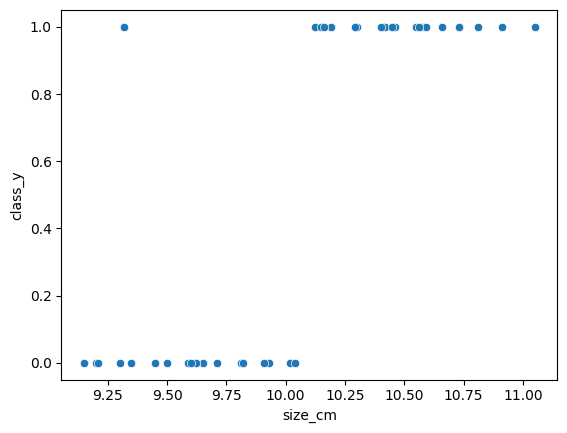

In [38]:
sns.scatterplot(x=df_new.size_cm,y=df_new.class_y)

### LogisticRegression

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
lore = LogisticRegression()

In [52]:
x = df_new.drop("size_cm",axis=1)
y = df_new.class_y

In [53]:
print(x.shape,y.shape)

(40, 1) (40,)


In [54]:
lore.fit(x,y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [55]:
lore.predict(x)

array([0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1])

In [56]:
np.array(df_new.class_y)

array([0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1])

In [57]:
lore.predict_proba(x)

array([[0.81895809, 0.18104191],
       [0.14808865, 0.85191135],
       [0.14808865, 0.85191135],
       [0.81895809, 0.18104191],
       [0.14808865, 0.85191135],
       [0.81895809, 0.18104191],
       [0.81895809, 0.18104191],
       [0.14808865, 0.85191135],
       [0.81895809, 0.18104191],
       [0.81895809, 0.18104191],
       [0.81895809, 0.18104191],
       [0.14808865, 0.85191135],
       [0.14808865, 0.85191135],
       [0.14808865, 0.85191135],
       [0.14808865, 0.85191135],
       [0.14808865, 0.85191135],
       [0.81895809, 0.18104191],
       [0.81895809, 0.18104191],
       [0.14808865, 0.85191135],
       [0.14808865, 0.85191135],
       [0.14808865, 0.85191135],
       [0.81895809, 0.18104191],
       [0.81895809, 0.18104191],
       [0.14808865, 0.85191135],
       [0.81895809, 0.18104191],
       [0.14808865, 0.85191135],
       [0.14808865, 0.85191135],
       [0.14808865, 0.85191135],
       [0.14808865, 0.85191135],
       [0.14808865, 0.85191135],
       [0.

In [59]:
lore.coef_

array([[3.25897573]])

In [60]:
lore.intercept_

array([-1.50930433])

<Axes: xlabel='size_cm', ylabel='class_y'>

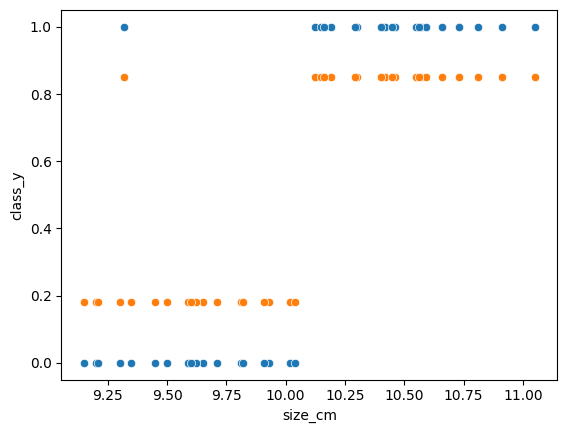

In [70]:
sns.scatterplot(x=df_new.size_cm,y=df_new.class_y)
sns.scatterplot(x=df_new.size_cm,y=lore.predict_proba(x)[:,1])

In [68]:
y_proba = lore.predict_proba(x)[:,1]

In [69]:
y_proba

array([0.18104191, 0.85191135, 0.85191135, 0.18104191, 0.85191135,
       0.18104191, 0.18104191, 0.85191135, 0.18104191, 0.18104191,
       0.18104191, 0.85191135, 0.85191135, 0.85191135, 0.85191135,
       0.85191135, 0.18104191, 0.18104191, 0.85191135, 0.85191135,
       0.85191135, 0.18104191, 0.18104191, 0.85191135, 0.18104191,
       0.85191135, 0.85191135, 0.85191135, 0.85191135, 0.85191135,
       0.18104191, 0.18104191, 0.85191135, 0.18104191, 0.85191135,
       0.18104191, 0.18104191, 0.85191135, 0.18104191, 0.85191135])

In [72]:
lore.score(x,y)*100

100.0